In [86]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

Xente fraud detection challenge. This is part of my attempts for the challenge.

In [87]:
#reading in all my files then viewing the heads just to see what is in the data

In [88]:
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
training = pd.read_csv('training.csv')
definitions = pd.read_csv('Xente_Variable_Definitions.csv')

In [161]:
test.describe()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,week_day,hour,TimeDifferenceSeconds
count,38188.000000,38188.000000,38188.000000,38188.000000,38188.000000,38188.000000,38188.000000,38188.000000,3.818800e+04,3.818800e+04,38188.000000,38188.000000,38188.000000,38188.000000,38188.000000
mean,47402.571934,2201.430685,1916.943464,2089.621007,2.917042,9.726747,1.727061,1.770687,7.650513e+05,7.791924e+05,1.984891,0.494134,2.782733,12.889258,1156.789934
std,26660.862923,1094.954257,893.698125,1141.431454,1.658525,6.345133,1.685161,0.464829,1.669980e+06,1.663720e+06,0.896630,0.499972,2.132321,4.998815,5312.556733
min,5.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-9.000000e+05,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23417.000000,1120.000000,1440.000000,955.000000,2.000000,6.000000,0.000000,2.000000,8.000000e+02,1.000000e+03,2.000000,0.000000,1.000000,9.000000,1.000000
50%,47936.500000,2621.000000,2057.000000,2184.000000,3.000000,6.000000,2.000000,2.000000,2.000000e+04,3.000000e+04,2.000000,0.000000,3.000000,13.000000,4.000000
75%,69499.250000,3219.000000,2532.000000,3104.000000,4.000000,16.000000,2.000000,2.000000,6.000000e+05,6.293740e+05,2.000000,1.000000,5.000000,17.000000,121.000000
max,94805.000000,3632.000000,3625.000000,3741.000000,5.000000,22.000000,8.000000,3.000000,9.880000e+06,9.880000e+06,4.000000,1.000000,6.000000,23.000000,111140.000000


In [162]:
training.describe()

,Amount,Value,PricingStrategy,FraudResult,hour,TimeDifference,TimeDifferenceSeconds
count,9.566200e+04,9.566200e+04,95662.000000,95662.000000,95662.000000,95662,95662.000000
mean,6.717846e+03,9.900584e+03,2.255974,0.002018,12.447722,0 days 17:36:53.190221,1056.453796
std,1.233068e+05,1.231221e+05,0.732924,0.044872,4.846964,3 days 04:33:40.712945,4593.665197
min,-1.000000e+06,2.000000e+00,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000
25%,-5.000000e+01,2.750000e+02,2.000000,0.000000,8.000000,0 days 00:01:05,1.000000
50%,1.000000e+03,1.000000e+03,2.000000,0.000000,13.000000,0 days 00:04:01,4.000000
75%,2.800000e+03,5.000000e+03,2.000000,0.000000,17.000000,0 days 02:08:55.500000,128.000000
max,9.880000e+06,9.880000e+06,4.000000,1.000000,23.000000,79 days 17:22:10,114802.000000


In [89]:
definitions

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


Visualising the data to see the fields and what the data contains

In [90]:
sample.head(2)

,TransactionId,FraudResult
0,TransactionId_50600,NaN
1,TransactionId_95109,NaN


In [91]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [92]:
training.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [93]:
training['CurrencyCode'].unique()

array(['UGX'], dtype=object)

In [94]:
training['CountryCode'].unique()

array([256])

In [95]:
training['PricingStrategy'].unique()

array([2, 4, 1, 0])

In [96]:
training['ProductCategory'].unique()

array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
       'tv', 'transport', 'ticket', 'movies', 'other'], dtype=object)

In [97]:
training['FraudResult'].unique()


array([0, 1])

In [98]:
training['TransactionStartTime'] = pd.to_datetime(training['TransactionStartTime'])

In [99]:
training.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [100]:
training['ChannelId'].unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5'],
      dtype=object)

In [101]:
len(training)

95662

In [102]:
training['ProviderId'].unique()

array(['ProviderId_6', 'ProviderId_4', 'ProviderId_1', 'ProviderId_5',
       'ProviderId_3', 'ProviderId_2'], dtype=object)

In [103]:
training['ProductId'].unique()

array(['ProductId_10', 'ProductId_6', 'ProductId_1', 'ProductId_21',
       'ProductId_3', 'ProductId_15', 'ProductId_11', 'ProductId_19',
       'ProductId_4', 'ProductId_5', 'ProductId_20', 'ProductId_9',
       'ProductId_24', 'ProductId_14', 'ProductId_2', 'ProductId_13',
       'ProductId_22', 'ProductId_8', 'ProductId_7', 'ProductId_27',
       'ProductId_12', 'ProductId_16', 'ProductId_23'], dtype=object)

In [104]:
training['CustomerId'].nunique()

3742

In [105]:
training['TransactionId'].nunique()
#all entries are unique

95662

In [106]:
training['BatchId'].nunique()

94809

In [107]:
training['AccountId'].nunique()

3633

In [108]:
training['SubscriptionId'].nunique()

3627

In [109]:
training.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In the following cells, we check whether or not our dataframe has any null values.

In [110]:
test.isnull().values.any()

False

In [111]:
training.isnull().values.any()

False

In [112]:
training.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In the next cells we will start extracting features from our data and make sense of our features.

In [113]:
training['TransactionStartTime'].dtype

datetime64[ns, UTC]

In [114]:
#TransactionStateTime is already a datetime column so we can now move further and extract specifics like day of week and hour and make new features from these
training['week_day'] = training['TransactionStartTime'].dt.day_name()

In [115]:
training.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,week_day
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,Thursday
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,Thursday
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,Thursday
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,Thursday
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,Thursday


In [116]:
training['hour'] = training['TransactionStartTime'].dt.hour
training.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,week_day,hour
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,Thursday,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,Thursday,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,Thursday,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,Thursday,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,Thursday,3


In [117]:
training.loc[training['AccountId'] == 'AccountId_3957']

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,week_day,hour
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,Thursday,2
1492,TransactionId_70149,BatchId_63988,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-16 12:44:49+00:00,2,0,Friday,12
1645,TransactionId_54062,BatchId_56707,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-16 14:20:12+00:00,2,0,Friday,14
2387,TransactionId_65352,BatchId_12232,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,2000.0,2000,2018-11-17 09:44:15+00:00,2,0,Saturday,9
2414,TransactionId_139384,BatchId_114476,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_11,data_bundles,ChannelId_3,500.0,500,2018-11-17 10:34:28+00:00,2,0,Saturday,10
2498,TransactionId_76173,BatchId_31435,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-17 13:43:24+00:00,2,0,Saturday,13
2845,TransactionId_52075,BatchId_132560,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1500.0,1500,2018-11-18 08:54:58+00:00,2,0,Sunday,8
2881,TransactionId_122877,BatchId_42615,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,10000.0,10000,2018-11-18 10:27:29+00:00,2,0,Sunday,10
2885,TransactionId_80040,BatchId_14374,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-18 10:33:42+00:00,2,0,Sunday,10
3276,TransactionId_87182,BatchId_129536,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,2000.0,2000,2018-11-19 11:19:55+00:00,2,0,Monday,11


In [118]:
#Before proceeding any further, I wana delete the CurrencyCode and CountryCode columns since they have 1 unique value, it is therefore not a useful feature
training = training.drop(columns=['CountryCode', 'CurrencyCode'], axis=1)

In [119]:
#next idea is to find differences in time from previous transaction for each account id.
#Grouping by account id and date column
training['TimeDifference'] = training.sort_values(['AccountId','TransactionStartTime']).groupby('AccountId')['TransactionStartTime'].diff()

In [121]:
#All the first transactions have Nat, so we'll make the TimeDifference column for those 0
#training = training.replace({'NaT': '0'}, inplace=True)
training.replace({pd.NaT: "0"}, inplace=True)

In [123]:
training['TimeDifference'].dtype

dtype('O')

In [126]:
training['TimeDifference'] = pd.to_timedelta(training['TimeDifference'])

In [128]:
#This gives us the time difference between last transaction grouped by account id
training['TimeDifferenceSeconds'] = training['TimeDifference'].dt.total_seconds().div(60).astype(int)
training.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,week_day,hour,TimeDifference,TimeDifferenceSeconds
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,Thursday,2,00:00:00,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,Thursday,2,00:00:00,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,Thursday,2,00:00:00,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,Thursday,3,00:00:00,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,Thursday,3,01:15:13,75


In [130]:
training.FraudResult.value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

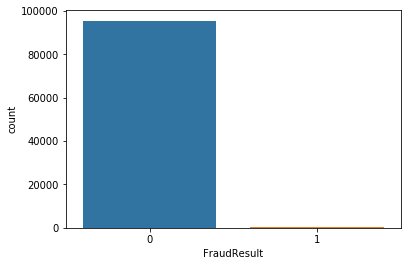

In [129]:
sns.countplot(x=training['FraudResult'])

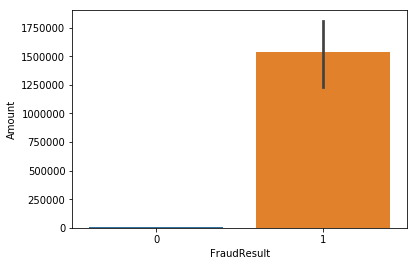

In [69]:
sns.barplot(x='FraudResult', y='Amount', data=train)

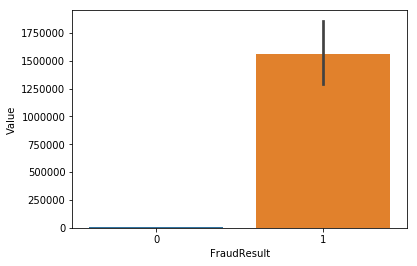

In [70]:
sns.barplot(x='FraudResult', y='Value', data=train)

### We also have to implement methods to deal with imbalanced data.
As can be seen, fraud cases are way too small in comparison to non-fraud cases. So we have to resample our data. The different methods that are mostly used are oversampling, undersampling. In our case we'll use oversampling(just a hunch). Also another thing to point out is that using accuracy for fraud detection without resampling is not the right metric since the machine will figure out that making everything 0 will give a high accuracy. So we have to use other metrics such as F1 score, confusion matrices, precision or recall.

In [131]:
FraudResult_0, FraudResult_1 = training.FraudResult.value_counts()
training_FraudResult_0 = training[training['FraudResult'] == 0]
training_FraudResult_1 = training[training['FraudResult'] == 1]

Random over-sampling:
1    95469
0    95469
Name: FraudResult, dtype: int64


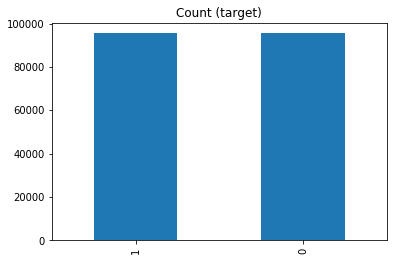

In [132]:
FraudResult1 = training_FraudResult_1.sample(FraudResult_0, replace=True)
df_train = pd.concat([training_FraudResult_0, FraudResult1], axis=0)

print('Random over-sampling:')
print(df_train.FraudResult.value_counts())

df_train.FraudResult.value_counts().plot(kind='bar', title='Count (FraudResult)');


In [133]:
df_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,week_day,hour,TimeDifference,TimeDifferenceSeconds
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,Thursday,2,00:00:00,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,Thursday,2,00:00:00,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,Thursday,2,00:00:00,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,Thursday,3,00:00:00,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,Thursday,3,01:15:13,75


In [137]:
df_train['ProviderId'] = df_train['ProviderId'].astype('category').cat.codes
df_train['ProductId'] = df_train['ProductId'].astype('category').cat.codes
df_train['ProductCategory'] = df_train['ProductCategory'].astype('category').cat.codes
df_train['ChannelId'] = df_train['ChannelId'].astype('category').cat.codes
df_train['BatchId'] = df_train['BatchId'].astype('category').cat.codes
df_train['AccountId'] = df_train['AccountId'].astype('category').cat.codes
df_train['SubscriptionId'] = df_train['SubscriptionId'].astype('category').cat.codes
df_train['CustomerId'] = df_train['CustomerId'].astype('category').cat.codes
df_train['week_day'] = df_train['week_day'].astype('category').cat.codes

In [138]:
#TransactionId is unique for all entries so not useful featuure, extracted features from transaction starttime so I'll drop it, and timedifference is the same
#as timedifferenceseconds so I'm also dropping this
df_train = df_train.drop(columns=['TransactionId', 'TransactionStartTime', 'TimeDifference'], axis=1)

KeyError: "['TransactionId' 'TransactionStartTime' 'TimeDifference'] not found in axis"

In [136]:
df_train.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,week_day,hour,TimeDifferenceSeconds,CuctomerId
0,46980,2490,3535,CustomerId_4406,5,1,0,2,1000.0,1000,2,0,4,2,0,2584
1,31755,3219,2366,CustomerId_4406,3,19,2,1,-20.0,20,2,0,4,2,0,2584
2,60272,2713,996,CustomerId_4683,5,0,0,2,500.0,500,2,0,4,2,0,2806
3,1797,3351,974,CustomerId_988,0,11,8,2,20000.0,21800,2,0,4,3,0,3733
4,48941,3219,2366,CustomerId_988,3,19,2,1,-644.0,644,2,0,4,3,75,3733


In [139]:
df_train.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,week_day,hour,TimeDifferenceSeconds,CuctomerId
0,46980,2490,3535,2584,5,1,0,2,1000.0,1000,2,0,4,2,0,2584
1,31755,3219,2366,2584,3,19,2,1,-20.0,20,2,0,4,2,0,2584
2,60272,2713,996,2806,5,0,0,2,500.0,500,2,0,4,2,0,2806
3,1797,3351,974,3733,0,11,8,2,20000.0,21800,2,0,4,3,0,3733
4,48941,3219,2366,3733,3,19,2,1,-644.0,644,2,0,4,3,75,3733


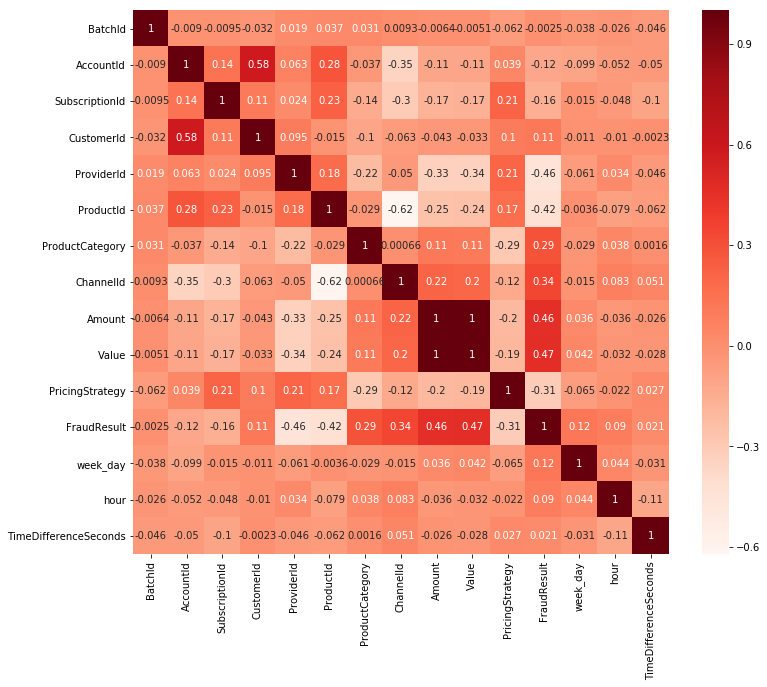

In [148]:
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [140]:
df_train = df_train.drop(columns=['CuctomerId'], axis=1)

In [142]:
labels = np.array(df_train['FraudResult'])
features= df_train.drop('FraudResult', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [143]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [144]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (152750, 14)
Training Labels Shape: (152750,)
Testing Features Shape: (38188, 14)
Testing Labels Shape: (38188,)


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, matthews_corrcoef
MCC_scorer = make_scorer(matthews_corrcoef)
pipeline_rf = Pipeline([('model', RandomForestClassifier(n_jobs=-1, random_state=1))])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(train_features, train_labels)
grid_rf.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.7s finished


0.9996072787757593

In [156]:
grid_rf.best_params_

{'model__n_estimators': 75}

In [157]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score


In [176]:
def metric_evaluations(estimator, test_features, test_labels):
    pred_labels = estimator.predict(test_features)
    print('confusion matrix')
    print(confusion_matrix(test_labels, pred_labels), '\n')
    print('classification report')
    print(classification_report(test_labels, pred_labels))
    print('Accuracy')
    y_score = estimator.predict_proba(test_features)[:,1]
    print('Accuracy', accuracy_score(test_labels, pred_labels))   

https://www.kaggle.com/pileatedperch/detecting-fraud-with-random-forest-mcc-0-869
Got some help from this link

In [177]:
metric_evaluations(grid_rf, test_features, test_labels)

confusion matrix
[[18988     3]
 [    0 19197]] 

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18991
           1       1.00      1.00      1.00     19197

   micro avg       1.00      1.00      1.00     38188
   macro avg       1.00      1.00      1.00     38188
weighted avg       1.00      1.00      1.00     38188

Accuracy
Accuracy 0.9999214412904578


### Methods to try out
inorder to detect a good method, I'm going to try out a couple of popular methods. I'm also going to implement wide and deep learning to see how it competes.
Methods: Wide and Deep Learning
Random Forests
Clustering
Support Vector Machines
k-Nearest Neighbors
NNs and DNNs



Trying out wide and deep learning for this fraud detection using tensorflow estimators